# Modeling

In [1]:
import pandas as pd
from wrangle_2 import wrangle
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
import sklearn.preprocessing

In [2]:
cost, epi_census, fbi, intern, commute = wrangle()

In [3]:
cost = cost.dropna()

In [4]:
num_cost = cost.drop(columns={'msa'})

In [5]:
num_cost

,parents,children,housing,food,transportation,healthcare,other,childcare,taxes,total,...,homes_with_computer,homes_with_internet,in_preschool,in_kindergarten,in_junior_high,in_high_school,in_college_plus,less_than_high_school,high_school_to_associates,bachelors_plus
0,1,0,9246,3285,11075,5873,4541,0,5109,39129,...,94.7,91.3,5.9,2.8,43.1,22.6,25.6,11.2,63.4,25.5
1,1,1,12489,4842,11838,8869,6280,7572,5111,57001,...,94.7,91.3,5.9,2.8,43.1,22.6,25.6,11.2,63.4,25.5
2,1,2,12489,7094,12709,11866,7096,12797,4755,68806,...,94.7,91.3,5.9,2.8,43.1,22.6,25.6,11.2,63.4,25.5
3,1,3,16805,9464,13922,14862,9518,14405,6253,85228,...,94.7,91.3,5.9,2.8,43.1,22.6,25.6,11.2,63.4,25.5
4,1,4,16805,11584,14309,17858,10286,14405,5891,91138,...,94.7,91.3,5.9,2.8,43.1,22.6,25.6,11.2,63.4,25.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,2,0,9220,5638,13746,14691,5384,0,7049,55728,...,94.7,87.9,5.2,5.6,44.0,23.2,22.0,23.3,60.1,16.6
2426,2,1,12123,7017,14764,18360,6935,9045,8728,76973,...,94.7,87.9,5.2,5.6,44.0,23.2,22.0,23.3,60.1,16.6
2427,2,2,12123,8887,15534,22030,7613,17404,9449,93040,...,94.7,87.9,5.2,5.6,44.0,23.2,22.0,23.3,60.1,16.6
2428,2,3,17276,10851,16743,25699,10191,19977,11904,112640,...,94.7,87.9,5.2,5.6,44.0,23.2,22.0,23.3,60.1,16.6


## Min_max

In [6]:
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(num_cost)

min_max_cost = scaler.transform(num_cost)
min_max_cost_df = pd.DataFrame(min_max_cost, columns = num_cost.columns, index = num_cost.index.values)

In [7]:
min_max_cost_df

,parents,children,housing,food,transportation,healthcare,other,childcare,taxes,total,...,homes_with_computer,homes_with_internet,in_preschool,in_kindergarten,in_junior_high,in_high_school,in_college_plus,less_than_high_school,high_school_to_associates,bachelors_plus
0,0.0,0.00,0.073506,0.028872,0.122131,0.064955,0.054275,0.000000,0.094971,0.037258,...,0.517241,0.782383,0.595745,0.244186,0.658080,0.598326,0.238411,0.310469,0.723810,0.214583
1,0.0,0.25,0.143617,0.099223,0.197953,0.159930,0.131072,0.192574,0.095026,0.142304,...,0.517241,0.782383,0.595745,0.244186,0.658080,0.598326,0.238411,0.310469,0.723810,0.214583
2,0.0,0.50,0.143617,0.200976,0.284508,0.254937,0.167108,0.325458,0.085195,0.211689,...,0.517241,0.782383,0.595745,0.244186,0.658080,0.598326,0.238411,0.310469,0.723810,0.214583
3,0.0,0.75,0.236926,0.308061,0.405048,0.349913,0.274068,0.366353,0.126564,0.308212,...,0.517241,0.782383,0.595745,0.244186,0.658080,0.598326,0.238411,0.310469,0.723810,0.214583
4,0.0,1.00,0.236926,0.403850,0.443506,0.444888,0.307984,0.366353,0.116567,0.342949,...,0.517241,0.782383,0.595745,0.244186,0.658080,0.598326,0.238411,0.310469,0.723810,0.214583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,1.0,0.00,0.072943,0.135189,0.387558,0.344492,0.091503,0.000000,0.148546,0.134822,...,0.517241,0.606218,0.521277,0.569767,0.679157,0.623431,0.178808,0.747292,0.645238,0.029167
2426,1.0,0.25,0.135704,0.197497,0.488721,0.460802,0.159998,0.230036,0.194913,0.259692,...,0.517241,0.606218,0.521277,0.569767,0.679157,0.623431,0.178808,0.747292,0.645238,0.029167
2427,1.0,0.50,0.135704,0.281990,0.565239,0.577144,0.189940,0.442625,0.214824,0.354128,...,0.517241,0.606218,0.521277,0.569767,0.679157,0.623431,0.178808,0.747292,0.645238,0.029167
2428,1.0,0.75,0.247108,0.370730,0.685382,0.693454,0.303789,0.508062,0.282621,0.469330,...,0.517241,0.606218,0.521277,0.569767,0.679157,0.623431,0.178808,0.747292,0.645238,0.029167


In [8]:
X = min_max_cost_df[['parents', 'children', 'housing', 'food', 'transportation', 
          'healthcare', 'other', 'childcare', 'taxes', 'total', 
          'median_family_income', 'under_5', '5-9', '10-14', 
          '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', 
          '45-59', '60-89', '90+', 'murder_and_nonnegligent_manslaughter', 
          'rape', 'robbery', 'aggravated_assault', 'property_crime', 
          'burglary', 'larceny_theft', 'motor_vehicle_theft', 'homes_with_computer', 
          'homes_with_internet', 'less_than_high_school', 
          'high_school_to_associates', 'bachelors_plus']]

In [9]:
X_agg = min_max_cost_df[['affordability_ratio', 'est_commute', 'violent_crime', 
              'homes_with_computer', 'homes_with_internet', 'less_than_high_school', 'high_school_to_associates', 
              'bachelors_plus']]

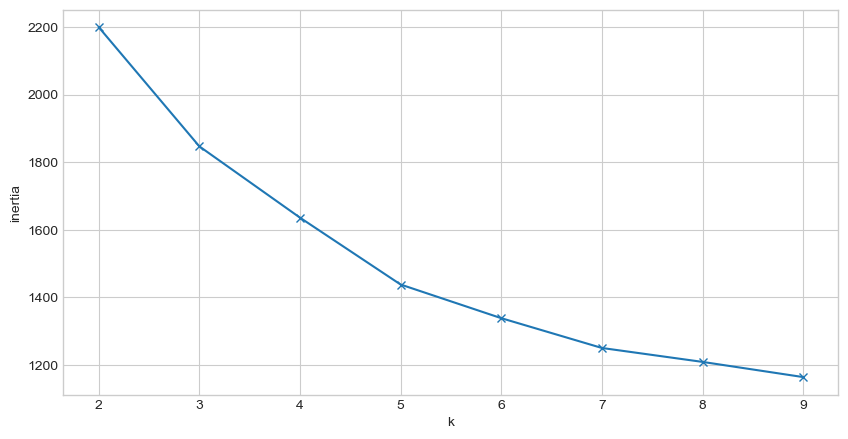

In [10]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,5))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 10)}).plot(marker='x')
    plt.xticks(range(2, 10))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.show()

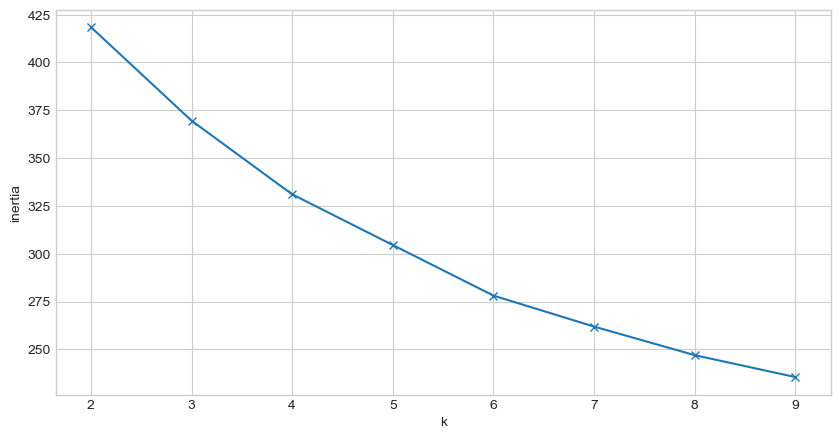

In [11]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,5))
    pd.Series({k: KMeans(k).fit(X_agg).inertia_ for k in range(2, 10)}).plot(marker='x')
    plt.xticks(range(2, 10))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.show()

In [12]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

all_cluster = kmeans.predict(X)
X['clusters'] = all_cluster

In [13]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_agg)

agg_cluster = kmeans.predict(X_agg)
X_agg['clusters'] = agg_cluster

## Standard

In [14]:
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(num_cost)

standard_cost = scaler.transform(num_cost)
standard_cost_df = pd.DataFrame(standard_cost, columns = num_cost.columns, index = num_cost.index.values)

In [15]:
standard_cost_df

,parents,children,housing,food,transportation,healthcare,other,childcare,taxes,total,...,homes_with_computer,homes_with_internet,in_preschool,in_kindergarten,in_junior_high,in_high_school,in_college_plus,less_than_high_school,high_school_to_associates,bachelors_plus
0,-1.0,-1.414214,-0.976938,-1.626940,-1.739730,-1.519126,-1.363726,-1.521426,-0.984115,-1.634047,...,-0.47498,0.358072,0.385657,-1.609248,0.381072,0.350619,-0.202668,0.304082,0.606358,-0.652301
1,-1.0,-0.707107,-0.373637,-1.199331,-1.316170,-0.951278,-0.777990,-0.637474,-0.983668,-0.967457,...,-0.47498,0.358072,0.385657,-1.609248,0.381072,0.350619,-0.202668,0.304082,0.606358,-0.652301
2,-1.0,0.000000,-0.373637,-0.580851,-0.832657,-0.383241,-0.503142,-0.027511,-1.063206,-0.527155,...,-0.47498,0.358072,0.385657,-1.609248,0.381072,0.350619,-0.202668,0.304082,0.606358,-0.652301
3,-1.0,0.707107,0.429277,0.070036,-0.159290,0.184607,0.312644,0.160206,-0.728522,0.085353,...,-0.47498,0.358072,0.385657,-1.609248,0.381072,0.350619,-0.202668,0.304082,0.606358,-0.652301
4,-1.0,1.414214,0.429277,0.652264,0.055543,0.752455,0.571324,0.160206,-0.809400,0.305784,...,-0.47498,0.358072,0.385657,-1.609248,0.381072,0.350619,-0.202668,0.304082,0.606358,-0.652301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,1.0,-1.414214,-0.981774,-0.980721,-0.256992,0.152196,-1.079784,-1.521426,-0.550679,-1.014938,...,-0.47498,-0.905523,-0.080140,0.438481,0.521033,0.515419,-0.547530,2.784332,0.164640,-1.634471
2426,1.0,-0.707107,-0.441724,-0.601998,0.308125,0.847601,-0.557371,-0.465517,-0.175556,-0.222542,...,-0.47498,-0.905523,-0.080140,0.438481,0.521033,0.515419,-0.547530,2.784332,0.164640,-1.634471
2427,1.0,0.000000,-0.441724,-0.088429,0.735571,1.543196,-0.329005,0.510308,-0.014470,0.376725,...,-0.47498,-0.905523,-0.080140,0.438481,0.521033,0.515419,-0.547530,2.784332,0.164640,-1.634471
2428,1.0,0.707107,0.516897,0.450956,1.406716,2.238601,0.539326,0.810679,0.534027,1.107766,...,-0.47498,-0.905523,-0.080140,0.438481,0.521033,0.515419,-0.547530,2.784332,0.164640,-1.634471


In [16]:
X = standard_cost_df[['parents', 'children', 'housing', 'food', 'transportation', 
          'healthcare', 'other', 'childcare', 'taxes', 'total', 
          'median_family_income', 'under_5', '5-9', '10-14', 
          '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', 
          '45-59', '60-89', '90+', 'murder_and_nonnegligent_manslaughter', 
          'rape', 'robbery', 'aggravated_assault', 'property_crime', 
          'burglary', 'larceny_theft', 'motor_vehicle_theft', 'homes_with_computer', 
          'homes_with_internet', 'less_than_high_school', 
          'high_school_to_associates', 'bachelors_plus']]

In [17]:
X_agg = standard_cost_df[['affordability_ratio', 'est_commute', 'violent_crime', 
              'homes_with_computer', 'homes_with_internet', 'less_than_high_school', 'high_school_to_associates', 
              'bachelors_plus']]

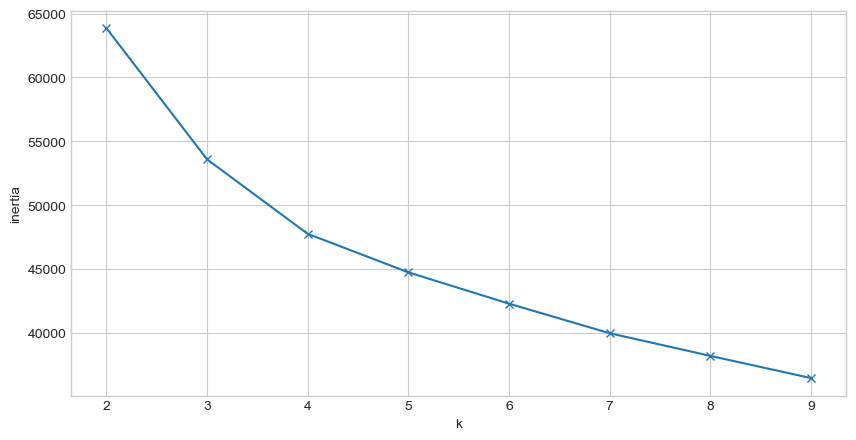

In [18]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,5))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 10)}).plot(marker='x')
    plt.xticks(range(2, 10))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.show()

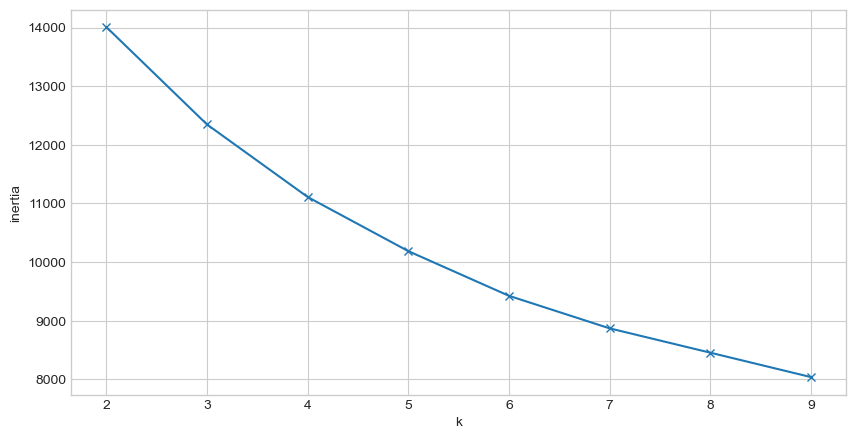

In [19]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,5))
    pd.Series({k: KMeans(k).fit(X_agg).inertia_ for k in range(2, 10)}).plot(marker='x')
    plt.xticks(range(2, 10))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.show()

In [20]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

all_cluster = kmeans.predict(X)
X['clusters'] = all_cluster

In [21]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_agg)

agg_cluster = kmeans.predict(X_agg)
X_agg['clusters'] = agg_cluster